<a href="https://colab.research.google.com/github/MoseT1/KoreaUniversity-Assignments/blob/main/Lab02_MAB_(practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Armed Bandit (MAB)
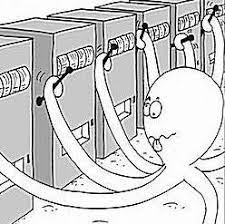

- Imagine you're in a room full of slot machines, each with different patterns of payouts. Your goal is to maximize your earnings, but there's a catch: you don't know which machine is the best one to play. This situation is what we call a "multi-armed bandit" problem in statistics and machine learning. What would you do, in this situation?

# Import Packages

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define Multi-Armed Bandit

In [2]:
class Multi_Armed_Bandit:
    def __init__(self):
        self.num_arms = 5
        self.distributions = [
            lambda : np.random.rayleigh(1) - 0.75,
            lambda : np.random.gamma(0.8, 0.9) - 1,
            lambda : np.random.binomial(1, 0.5) - 0.5,
            lambda : np.random.normal(0, 1),
            lambda : np.random.choice(np.random.dirichlet((10, 5, 3))) - 0.5,
        ]
        random.shuffle(self.distributions)
        self.reward_distributions = {i:self.distributions[i] for i in range(self.num_arms)}

    def pull(self, arm):
        assert 0 <= arm < self.num_arms
        return self.reward_distributions[arm]()


# Run with random policy
- randomly pull arms

In [15]:
# bandit instance
bandit = Multi_Armed_Bandit()

# records
arm_rewards = {i:[] for i in range(5)}
total_rewards= []

for t in range(500):
    # random
    arm = np.random.choice(5)

    # pull
    reward = bandit.pull(arm)

    # record
    arm_rewards[arm] += [reward]
    total_rewards += [reward]


# Visualizaiton
- Rewards of pulling each arm
- cumulative rewards of pulling each arm
- cumulative total reward

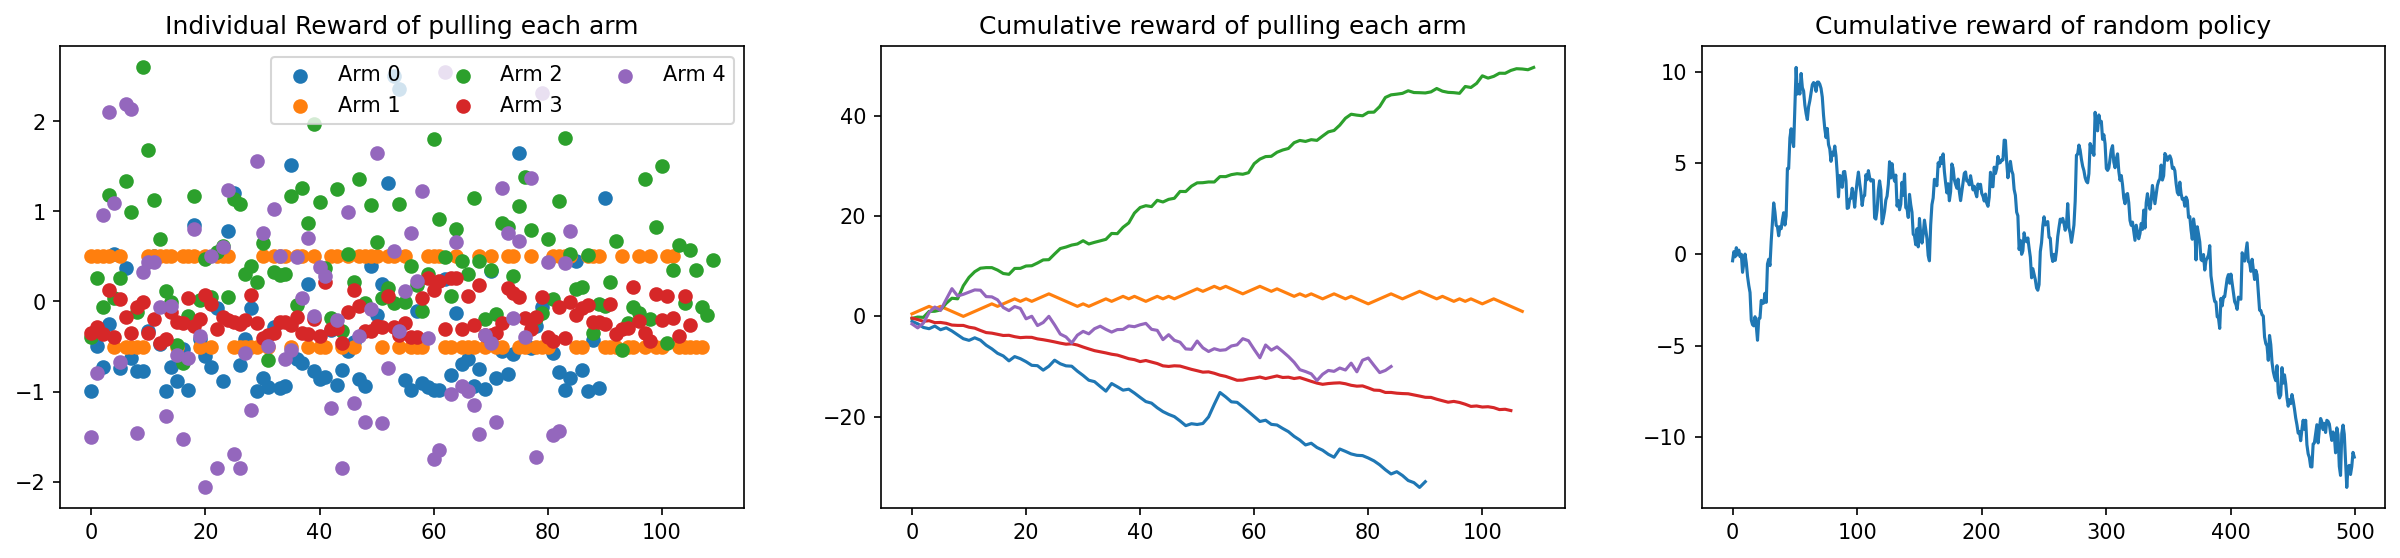

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), dpi=150)
axes[0].set_title('Individual Reward of pulling each arm')
axes[1].set_title('Cumulative reward of pulling each arm')
axes[2].set_title('Cumulative reward of random policy')
for i in range(5):
    axes[0].scatter(range(len(arm_rewards[i])), arm_rewards[i], label='Arm {}'.format(i))
    axes[1].plot(np.cumsum(arm_rewards[i]))
axes[2].plot(np.cumsum(total_rewards))

axes[0].legend(fontsize=10, ncols=3)
plt.show()
plt.close()

In [25]:
np.cumsum(arm_rewards[0])[-1]

-33.002347937044064

In [35]:
arr =[0,0,0,0,0]
for i in range(5):
      arr[i] = np.cumsum(arm_rewards[i])[-1] if len(arm_rewards[i])!=0  else 0

np.argmax(arr)

2

# Now implement your policy; You can do better than random...

## Exploration vs. Exploitation: how to balance it?
  - (Exploration): try new slot machines to find out which one gives the best rewards
  - (Exploitation): stick to the machine that you currently believe is the best to maximize your earnings

## Try to achieve highest cumulative reward!!!

In [42]:
# records
arm_rewards = {i:[] for i in range(5)}
total_rewards = []
arr =[0,0,0,0,0]
for t in range(1000):
    #######################
    #   your policy here  #
    #   arm = ...         #
    #######################

    for i in range(5):
      arr[i] = np.cumsum(arm_rewards[i])[-1] if len(arm_rewards[i])!=0  else 0

    if random.random() < 0.2:
      arm = random.randint(0,4)
    else:
      arm = np.argmax(arr)

    # pull
    reward = bandit.pull(arm)

    # record
    arm_rewards[arm] += [reward]
    total_rewards += [reward]

# Visualization

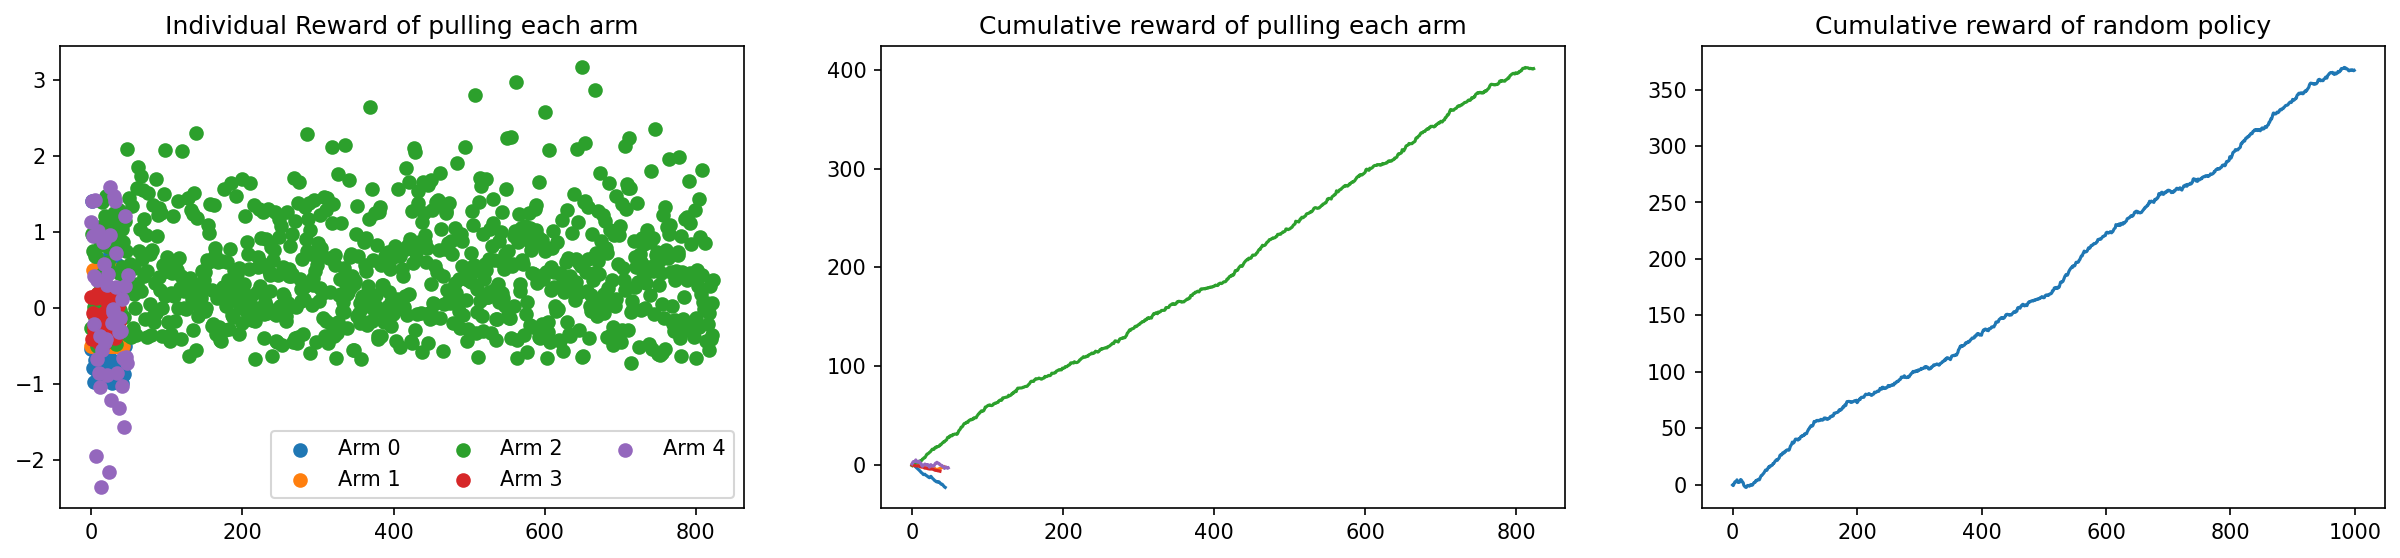

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), dpi=150)
axes[0].set_title('Individual Reward of pulling each arm')
axes[1].set_title('Cumulative reward of pulling each arm')
axes[2].set_title('Cumulative reward of random policy')
for i in range(5):
    axes[0].scatter(range(len(arm_rewards[i])), arm_rewards[i], label='Arm {}'.format(i))
    axes[1].plot(np.cumsum(arm_rewards[i]))
axes[2].plot(np.cumsum(total_rewards))

axes[0].legend(fontsize=10, ncols=3)
plt.show()
plt.close()